In [2]:
# import library
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import data
data = pd.read_csv('Employee.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# Data Splitting

In [4]:
# define features (X) and label (y)
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [5]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42,
                                                   stratify=y)

# Define Function

In [6]:
# definition function

# convert to dataframe
def ToDataFrame(D):
    df = pd.DataFrame(D, columns=['JoiningYear', 'Age', 'ExperienceInCurrentDomain', 
                                  'Education', 'City', 'PaymentTier', 'Gender', 'EverBenched'])
    return df

# make function to adding data who join in 2018
def JoinIn2018(DATA):
    # make blank list for new_values
    D = DATA.copy(deep=True)
    new_values = []
    
    # looping data for filltering
    for d in D['JoiningYear']:
        if d == 2018:
            new_values.append(1)
        else:
            new_values.append(0)
    
    # adding to dataframe
    col_index = D.columns.tolist().index('JoiningYear')+1
    D.insert(col_index, 'JoinIn2018', new_values)
    return D

# make function to bining data age
def BiningAge(D):
    bining_age = pd.cut(D['Age'],
                        bins=[0, 27, 35, 45],
                        labels=[1,2,3])
    col_index = D.columns.tolist().index('Age')+1
    D.insert(col_index, 'BiningAge', bining_age)
    return D

def EncodeEducation(D):
    # make blank list for new values
    new_values = []
    
    # looping for encode data
    for d  in D['Education']:
        if d == 'Bachelors':
            new_values.append(0)
        elif d == 'Masters':
            new_values.append(1)
        elif d == 'PHD':
            new_values.append(2)
        else:
            raise('There is foreign value')
    
    # change data value with new values
    D['Education'] = new_values
    return D

# make pipeline for step 4
from sklearn.preprocessing import StandardScaler
def scaling(D, scale=StandardScaler()):
    D_scaling = scale.fit_transform(D)
    return D_scaling

In [7]:
# import pipeline
import pickle
my_pipeline = pickle.load(open('model/pipeline.pkl','rb'))
my_pipeline

Pipeline(steps=[('s1',
                 Pipeline(steps=[('imp',
                                  ColumnTransformer(transformers=[('imp_mean',
                                                                   SimpleImputer(),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('imp_mode',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['Education',
                                                                    'City',
                                                                    'PaymentTier',
                                                                    'Gender',
                                                                    'EverBenched'])])),
                                 ('to_df',
                                  FunctionTransformer(func=<function ToDataFrame at 0x0000023DD47A45E0>))]))...
                ('s3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc_edu',
                                                  FunctionTransformer(func=<function EncodeEducation at 0x0000023DD47A47C0>),
                                                  ['Education']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender', 'EverBenched']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['City'])])),
                ('scl',
                 FunctionTransformer(func=<function scaling at 0x0000023DD47A4900>)),
                ('algo', KNeighborsClassifier())])

# Change Algorithm

In [8]:
# import library
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [9]:
new_pipeline = Pipeline(steps=my_pipeline.steps[:-1])
new_pipeline 

Pipeline(steps=[('s1',
                 Pipeline(steps=[('imp',
                                  ColumnTransformer(transformers=[('imp_mean',
                                                                   SimpleImputer(),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('imp_mode',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['Education',
                                                                    'City',
                                                                    'PaymentTier',
                                                                    'Gender',
                                                                    'EverBenched'])])),
                                 ('to_df',
                                  FunctionTransformer(func=<function ToDataFrame at 0x0000023DD47A45E0>))]))...
                                  FunctionTransformer(func=<function BiningAge at 0x0000023DD47A4720>))])),
                ('s3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc_edu',
                                                  FunctionTransformer(func=<function EncodeEducation at 0x0000023DD47A47C0>),
                                                  ['Education']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender', 'EverBenched']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['City'])])),
                ('scl',
                 FunctionTransformer(func=<function scaling at 0x0000023DD47A4900>))])

In [10]:
# new pipeline
new_pipeline.steps.insert(4, ('algo',SVC()))

In [11]:
new_pipeline

Pipeline(steps=[('s1',
                 Pipeline(steps=[('imp',
                                  ColumnTransformer(transformers=[('imp_mean',
                                                                   SimpleImputer(),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('imp_mode',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['Education',
                                                                    'City',
                                                                    'PaymentTier',
                                                                    'Gender',
                                                                    'EverBenched'])])),
                                 ('to_df',
                                  FunctionTransformer(func=<function ToDataFrame at 0x0000023DD47A45E0>))]))...
                                  FunctionTransformer(func=<function BiningAge at 0x0000023DD47A4720>))])),
                ('s3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc_edu',
                                                  FunctionTransformer(func=<function EncodeEducation at 0x0000023DD47A47C0>),
                                                  ['Education']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['Gender', 'EverBenched']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['City'])])),
                ('scl',
                 FunctionTransformer(func=<function scaling at 0x0000023DD47A4900>)),
                ('algo', SVC())])

# Tuning

In [12]:
# pipeline steps
new_pipeline.steps

[('s1',
  Pipeline(steps=[('imp',
                   ColumnTransformer(transformers=[('imp_mean', SimpleImputer(),
                                                    ['JoiningYear', 'Age',
                                                     'ExperienceInCurrentDomain']),
                                                   ('imp_mode',
                                                    SimpleImputer(strategy='most_frequent'),
                                                    ['Education', 'City',
                                                     'PaymentTier', 'Gender',
                                                     'EverBenched'])])),
                  ('to_df',
                   FunctionTransformer(func=<function ToDataFrame at 0x0000023DD47A45E0>))])),
 ('s2',
  Pipeline(steps=[('adding',
                   FunctionTransformer(func=<function JoinIn2018 at 0x0000023DD47A4360>)),
                  ('bining',
                   FunctionTransformer(func=<function BiningAge 

In [13]:
# param grid
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures
param_grid = {'scl__kw_args' : [{'scale' : StandardScaler()},
                                {'scale' : MinMaxScaler()}, 
                                {'scale' : Normalizer(norm='l1')}, 
                                {'scale' : Normalizer(norm='l2')},
                               {'scale' : PolynomialFeatures(degree=3)}],
              'algo__C' : list(range(1,1001,100)),
              'algo__gamma' : ['scale', 'auto']}


from sklearn.model_selection import GridSearchCV
model = GridSearchCV(new_pipeline, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('s1',
                                        Pipeline(steps=[('imp',
                                                         ColumnTransformer(transformers=[('imp_mean',
                                                                                          SimpleImputer(),
                                                                                          ['JoiningYear',
                                                                                           'Age',
                                                                                           'ExperienceInCurrentDomain']),
                                                                                         ('imp_mode',
                                                                                          SimpleImputer(strategy='most_frequent'),
                                                                                          ['Education',
                                                                                           'City',
                                                                                           'PaymentTier',
                                                                                           'Gender',
                                                                                           'EverBenched'])])),
                                                        ('to_df',
                                                         FunctionTransformer(func=<function ToDataFra...
                                        FunctionTransformer(func=<function scaling at 0x0000023DD47A4900>)),
                                       ('algo', SVC())]),
             n_jobs=-1,
             param_grid={'algo__C': [1, 101, 201, 301, 401, 501, 601, 701, 801,
                                     901],
                         'algo__gamma': ['scale', 'auto'],
                         'scl__kw_args': [{'scale': StandardScaler()},
                                          {'scale': MinMaxScaler()},
                                          {'scale': Normalizer(norm='l1')},
                                          {'scale': Normalizer()},
                                          {'scale': PolynomialFeatures(degree=3)}]},
             verbose=1)

In [14]:
# score 
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Best estimator : {model.best_estimator_}')
print(f'Train score : {train_score}')
print(f'Test score : {test_score}')

Best estimator : Pipeline(steps=[('s1',
                 Pipeline(steps=[('imp',
                                  ColumnTransformer(transformers=[('imp_mean',
                                                                   SimpleImputer(),
                                                                   ['JoiningYear',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain']),
                                                                  ('imp_mode',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['Education',
                                                                    'City',
                                                                    'PaymentTier',
                                                                    'Gen

In [15]:
# results cv
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__gamma,param_scl__kw_args,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
56,7.123625,1.116055,0.534650,0.067130,501,auto,{'scale': MinMaxScaler()},"{'algo__C': 501, 'algo__gamma': 'auto', 'scl__...",0.853379,0.845183,0.849771,0.849771,0.849526,0.002908,1
66,7.531048,0.134551,0.437150,0.009189,601,auto,{'scale': MinMaxScaler()},"{'algo__C': 601, 'algo__gamma': 'auto', 'scl__...",0.853379,0.846330,0.848624,0.848624,0.849239,0.002567,2
86,9.685867,1.649287,0.470858,0.078426,801,auto,{'scale': MinMaxScaler()},"{'algo__C': 801, 'algo__gamma': 'auto', 'scl__...",0.856816,0.842890,0.846330,0.847477,0.848378,0.005156,3
96,11.181380,1.241426,0.417740,0.016853,901,auto,{'scale': MinMaxScaler()},"{'algo__C': 901, 'algo__gamma': 'auto', 'scl__...",0.856816,0.842890,0.846330,0.846330,0.848092,0.005229,4
76,9.168572,1.132299,0.427114,0.030795,701,auto,{'scale': MinMaxScaler()},"{'algo__C': 701, 'algo__gamma': 'auto', 'scl__...",0.851088,0.842890,0.847477,0.847477,0.847233,0.002909,5
46,5.085260,0.324562,0.376707,0.011221,401,auto,{'scale': MinMaxScaler()},"{'algo__C': 401, 'algo__gamma': 'auto', 'scl__...",0.851088,0.839450,0.846330,0.849771,0.846660,0.004511,6
36,4.707895,0.375014,0.459057,0.012759,301,auto,{'scale': MinMaxScaler()},"{'algo__C': 301, 'algo__gamma': 'auto', 'scl__...",0.851088,0.841743,0.844037,0.846330,0.845800,0.003457,7
26,3.037985,0.257736,0.479805,0.037976,201,auto,{'scale': MinMaxScaler()},"{'algo__C': 201, 'algo__gamma': 'auto', 'scl__...",0.851088,0.841743,0.841743,0.846330,0.845226,0.003868,8
0,0.446974,0.002343,0.289230,0.015233,1,scale,{'scale': StandardScaler()},"{'algo__C': 1, 'algo__gamma': 'scale', 'scl__k...",0.844215,0.840596,0.840596,0.842890,0.842074,0.001551,9
5,0.475143,0.010922,0.409069,0.068326,1,auto,{'scale': StandardScaler()},"{'algo__C': 1, 'algo__gamma': 'auto', 'scl__kw...",0.844215,0.840596,0.840596,0.842890,0.842074,0.001551,9


# Evaluation

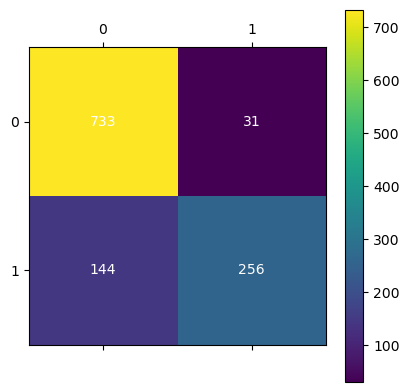

In [24]:
# prediction
y_pred = model.predict(X_test)

#confusion matriks
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

#visualization
import matplotlib.pyplot as plt
plt.matshow(matrix)

for (i, j), value in np.ndenumerate(matrix):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white')

plt.colorbar()
plt.show()

# Save Model

In [25]:
# model 
pickle.dump(model, open('model/svm1.pkl','wb'))

In [26]:
pickle.dump((tn,fp,fn,tp), open('eval/eval_svm1.pkl','wb'))